# <img style="float: left; padding-right: 10px; width: 200px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/assets/media/logo.png"> EPA-1316 Introduction to *Urban* Data Science 


## Homework 1: Data, Grammar and Engineering

**TU Delft**<br>
**Q1 2021**<br>
**Instructor:** Trivik Verma <br>
**TAs:** Auriane Técourt, Luka Janssens, Marya El Malki, Mobeen Nawaz, Stephan Olde, Ruth Nelson, Juliana Gonçalves  <br>
**[Centre for Urban Science & Policy](https://cusp.tbm.tudelft.nl/)** <br>

---



# Homework exercises to work on your own

## Exercise 1

Practice your data tidying skills with a different dataset. For example, you can have a look at the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

And its structure is as follows:

In [1]:
from IPython.display import IFrame
url = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1'
# IFrame(url, 700, 400)

Follow these steps:

* Download the table as a `csv` file (File --> Download as --> .csv, current sheet).
* Read it into Python.
* Explore it by creating a few plots.
* Examine its level of tidiness and turn it into a fully tidy dataset.
* Obtain a monthly total count of casualties and create a line or a bar plot of them.


_All code and notes below are written by Ewout ter Hoeven_

## Import the CSV
In this section we import the raw, unprocessed CSV. Note that we skip the first row here, since only the second row contains the headers.

We also remove the last row since it contains totals, we can recalculate them if needed. Another approach would be to do some light pre-processing of the CSV file in spreadsheet software.

In [2]:
import pandas as pd

In [3]:
# Import the CSV as a Pandas Dataframe
war_logs = pd.read_csv('data/war_logs.csv', skiprows=[0,74])

In [4]:
# Display the dataframe
war_logs

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004,January,15.0,51,23.0,NaN,11
1,2004,February,NaN,7,4.0,5.0,2
2,2004,March,19.0,2,NaN,2.0,3
3,2004,April,5.0,3,19.0,NaN,3
4,2004,May,18.0,29,56.0,6.0,9
...,...,...,...,...,...,...,...
67,2009,August,445.0,206,190.0,64.0,77
68,2009,September,614.0,197,133.0,54.0,70
69,2009,October,462.0,107,86.0,76.0,74
70,2009,November,410.0,120,69.0,30.0,32


## Process dates

In [5]:
import datetime

In [6]:
# Create new column 'date' that contains the month in datetime format using the Year and Month columns
war_logs['date'] = pd.to_datetime(war_logs['Year'].astype(str) + war_logs['Month'], format='%Y%B')

In [7]:
war_logs['date'][0]

Timestamp('2004-01-01 00:00:00')

In [8]:
# Create a column with dates in string format
war_logs['date_str'] = war_logs['date'].dt.strftime('%Y-%m')
war_logs['date_str'][0]

'2004-01'

## Plot

In [9]:
import seaborn as sns

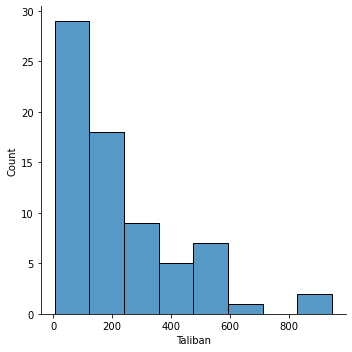

In [10]:
# Plot a histogram of Taliban deaths
_ = sns.displot(war_logs['Taliban'])

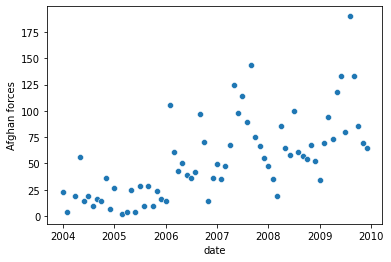

In [11]:
# Plot a scatter plot with the number of Afghan forces deaths over time
_ = sns.scatterplot(x=war_logs['date'], y=war_logs['Afghan forces'])

## Tidy

In [12]:
war_logs = war_logs.set_index('date_str')
war_logs = war_logs.drop(['Year', 'Month', 'date'], axis=1)
war_logs

,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
date_str,,,,,
2004-01,15.0,51,23.0,NaN,11
2004-02,NaN,7,4.0,5.0,2
2004-03,19.0,2,NaN,2.0,3
2004-04,5.0,3,19.0,NaN,3
2004-05,18.0,29,56.0,6.0,9
...,...,...,...,...,...
2009-08,445.0,206,190.0,64.0,77
2009-09,614.0,197,133.0,54.0,70
2009-10,462.0,107,86.0,76.0,74


In [13]:
# Only use official figures for NATO deaths
totals = war_logs[['Taliban', 'Civilians', 'Afghan forces', 'Nato - official figures']].sum(axis=1)

In [14]:
totals.head()

date_str
2004-01    100.0
2004-02     13.0
2004-03     24.0
2004-04     30.0
2004-05    112.0
dtype: float64

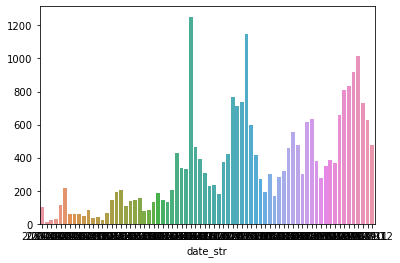

In [15]:
_ = sns.barplot(x=totals.index, y=totals)